In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.offsetbox import OffsetImage,AnnotationBbox

experiment_names = ['owl_exp_pure',
                    'owl_exp_mixed',
                    'strike_exp_pure',
                    'strike_exp_mixed',
                    'energy_gain_pure',
                    'energy_gain_mixed',
                    ]
totals = []
point_class_dfs = []
parameters = []
for label in experiment_names:
    file_path_pcs = '/home/mremington/Documents/krattle_analysis/krattle_analysis/per_cycle_analysis/data/{}_point_classifacation.csv'.format(label)
    temp_exp_pc = pd.read_csv(file_path_pcs,header = 0, index_col=None)
    point_class_dfs.append(temp_exp_pc)
    for i in range(1,7):
        file_path_totals = '/home/mremington/Documents/uumarrty_exps/{}/exp{}/Data/totals.csv'.format(label,i)
        temp_exp_total = pd.read_csv(file_path_totals,header = 0, index_col=None)
        temp_exp_total['experiment_name'] = [label for i in range(len(temp_exp_total))]
        totals.append(temp_exp_total)
        file_path_parameters = '/home/mremington/Documents/uumarrty_exps/{}/exp{}/Data/parameters.csv'.format(label,i)
        temp_exp_par = pd.read_csv(file_path_parameters,header = 0, index_col=None)
        temp_exp_par['experiment_name'] = [label for i in range(len(temp_exp_par))]
        parameters.append(temp_exp_par)

        
totals = pd.concat(totals, ignore_index=False)
pc_dfs = pd.concat(point_class_dfs, ignore_index=False)
par= pd.concat(parameters, ignore_index=False)

result = pd.merge(pc_dfs,
                  totals[['sim_id','data_type','mean_bush_pref']],
                  how="left",
                  left_on=['sim_id','org'],
                  right_on=["sim_id", "data_type"])

result['figure_label'] = [x[-1] for x in list(result['exp'])]

def format_title(exp_title):
    return exp_title.replace("_", " ").title()

def temp_data(df,filter_val):
    return df[df['exp_name']==filter_val]

def format_bar_chart_data(temp):
    bp_df = temp.groupby(['figure_label','org']).agg(
    # Get max of the duration column for each group
    Bush=pd.NamedAgg(column='mean_bush_pref', aggfunc='mean'),
    #     exp_std_bp=pd.NamedAgg(column='mean_bush_pref', aggfunc='std'),
    #     exp_se_bp=pd.NamedAgg(column='mean_bush_pref', aggfunc='sem')
        )
    #bp_df = bp_df.reset_index()
    open_preference = [1-x for x in list(bp_df['Bush'])]
    bp_df['Open']= open_preference
    bp_df = bp_df.unstack(level=-1)
    #bp_df=bp_df.iloc[::-1]
    #bp_df = bp_df[bp_df.columns[::-1]]
    return bp_df
    

In [2]:
initial_parm = par[['experiment_name','sim_id','initial_owl_pop','initial_snake_pop','krat_energy_gain_bush','krat_energy_gain_open','snake_strike_success_probability_bush','snake_strike_success_probability_open']]

initial_parm = pd.merge(initial_parm,
                  result[['sim_id','figure_label']],
                  how="left",
                  left_on=['sim_id'],
                  right_on=["sim_id"])
initial_exp_groups=[]
for i in experiment_names:
    if i in ['owl_exp_pure','owl_exp_mixed']:
        df_owl=initial_parm[initial_parm['experiment_name'].isin(['owl_exp_pure','owl_exp_mixed'])].groupby(by=['figure_label'])['initial_owl_pop','initial_snake_pop'].max()
        df_owl=df_owl.reset_index()
    elif i in ['strike_exp_pure','strike_exp_mixed']:
        df_ss=initial_parm[initial_parm['experiment_name'].isin(['strike_exp_pure','strike_exp_mixed'])].groupby(by=['figure_label'])['snake_strike_success_probability_bush','snake_strike_success_probability_open'].max()
        df_ss=df_ss.reset_index()
    elif i in ['energy_gain_pure','energy_gain_mixed']:
        df_eg=initial_parm[initial_parm['experiment_name'].isin(['energy_gain_pure','energy_gain_mixed'])].groupby(by=['figure_label'])['krat_energy_gain_bush','krat_energy_gain_open',].max()
        df_eg = df_eg.reset_index()

<ipython-input-2-11ad31e927ce>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_owl=initial_parm[initial_parm['experiment_name'].isin(['owl_exp_pure','owl_exp_mixed'])].groupby(by=['figure_label'])['initial_owl_pop','initial_snake_pop'].max()
<ipython-input-2-11ad31e927ce>:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_ss=initial_parm[initial_parm['experiment_name'].isin(['strike_exp_pure','strike_exp_mixed'])].groupby(by=['figure_label'])['snake_strike_success_probability_bush','snake_strike_success_probability_open'].max()
<ipython-input-2-11ad31e927ce>:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_eg=initial_parm[initial_parm['experiment_name'].isin(['energy_gain_pure','energy_gain_mixed'])].groupby(by=['figure_label'])['krat_e

<AxesSubplot:xlabel='figure_label'>

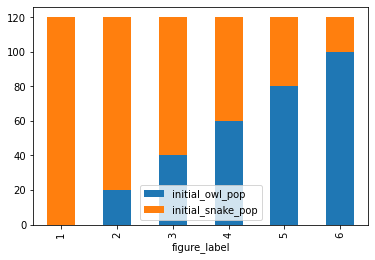

In [3]:
df_owl.set_index('figure_label').plot(kind='bar', stacked=True)

In [11]:
bp_df = result.groupby(['exp_name','figure_label','org']).agg(
    # Get max of the duration column for each group
    exp_mean_bp=pd.NamedAgg(column='mean_bush_pref', aggfunc='mean'),
#     exp_std_bp=pd.NamedAgg(column='mean_bush_pref', aggfunc='std'),
#     exp_se_bp=pd.NamedAgg(column='mean_bush_pref', aggfunc='sem')
    )
#bp_df = bp_df.reset_index()
bp_df = bp_df.unstack(level=-1) 
bp_df.head()   

exp_mean_bp          
org                                   krat     snake
exp_name          figure_label                      
energy_gain_mixed 1               0.501605  0.500694
                  2               0.496083  0.340117
                  3               0.368180  0.211628
                  4               0.271673  0.186619
                  5               0.233369  0.178743

In [50]:
# exps = result['exp_name'].unique()
# for i in exps:
#     temp = temp_data(df=result,filter_val=i)
#     ax = sns.catplot(
#     data=temp, kind="bar",
#     x="exp", y="mean_bush_pref", hue="org",
#     ci=95, palette="dark", alpha=.6, height=6
#     )
#     ax#.set_title(i)


In [7]:
# fig, ax = plt.subplots(len(exps), 3)

# for i, title in enumerate(exps):
#     for j in range(3):
#         if j==0:
#             sns.catplot(
#                 ax= ax[i,j],data=temp, kind="bar",
#                 x="exp", y="mean_bush_pref", hue="org",
#                 ci=95, palette="dark", alpha=.6
#                 )
#     ax[i,j].set_title(title)

# fig



In [12]:
df_owl.head()

,figure_label,initial_owl_pop,initial_snake_pop
0,1,0,120
1,2,20,100
2,3,40,80
3,4,60,60
4,5,80,40


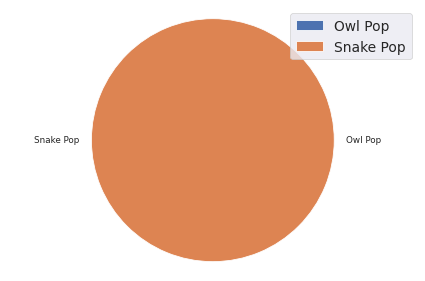

In [92]:
#make owl figures

sns.set_context("paper") 
for index, row in df_owl.iterrows():
    data = [row['initial_owl_pop'],row['initial_snake_pop']]
    fig1, ax1 = plt.subplots()
#     ax1.pie(data, labels=['Owls','Snakes'], autopct='%1.1f%%',
#             shadow=True, startangle=90)
    ax1.pie(data,labels=['Owl Pop','Snake Pop'])
    plt.legend(loc="upper right",fontsize='x-large',)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    #plt.legend(loc="upper right")
    fp = '/home/mremington/Documents/uumarrty_post_sim/uumarrty_post_sim_analysis/images/yaxis_labels/owl_figure_label_{}.png'.format(row['figure_label'])
    #plt.savefig(fp)
    fig1.tight_layout()
    break

In [18]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=None, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.  If ``sum(x) < 1``, then the values of *x* give
    the fractional area directly and the array will not be normalized. The
    resulting pie will have an empty wedge of size ``1 - sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : 1D array-like
        The wedge sizes.
    
    explode : array-like, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels : li

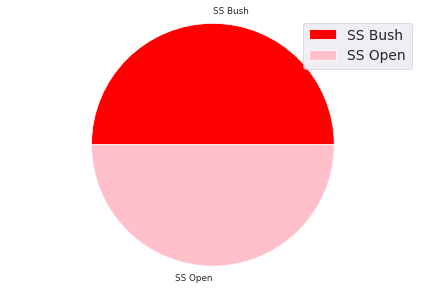

In [90]:
#make snake strike figures

sns.set_context("paper") 
for index, row in df_ss.iterrows():
    data = [row['snake_strike_success_probability_bush'],row['snake_strike_success_probability_open']]
    fig1, ax1 = plt.subplots()
#     ax1.pie(data, labels=['Owls','Snakes'], autopct='%1.1f%%',
#             shadow=True, startangle=90)
    ax1.pie(data,normalize=True,colors=['red','pink'],labels=['SS Bush','SS Open'])
    plt.legend(loc="upper right",fontsize='x-large',)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    #plt.legend(loc="upper right")
    fp = '/home/mremington/Documents/uumarrty_post_sim/uumarrty_post_sim_analysis/images/yaxis_labels/strike_success_figure_label_{}.png'.format(row['figure_label'])
    #plt.savefig(fp)
    fig1.tight_layout()
    break

In [24]:
df_eg.head()

,figure_label,krat_energy_gain_bush,krat_energy_gain_open
0,1,12,12
1,2,10,14
2,3,8,16
3,4,6,18
4,5,4,20


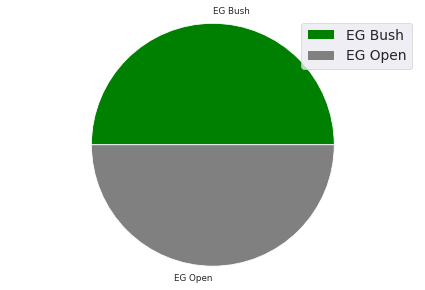

In [38]:
#make eg figures

sns.set_context("paper")
for index, row in df_eg.iterrows():
    data = [row['krat_energy_gain_bush'],row['krat_energy_gain_open']]
    fig1, ax1 = plt.subplots()
#     ax1.pie(data, labels=['Owls','Snakes'], autopct='%1.1f%%',
#             shadow=True, startangle=90)
    ax1.pie(data,normalize=True,colors=['green','grey'],labels=['EG Bush','EG Open'])
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.legend(loc="upper right",fontsize='x-large',)
    fp = '/home/mremington/Documents/uumarrty_post_sim/uumarrty_post_sim_analysis/images/yaxis_labels/energy_gain_figure_label_{}.png'.format(row['figure_label'])
#     plt.savefig(fp)
    fig1.tight_layout()
    break
    


In [14]:
#https://stackoverflow.com/questions/44246650/add-image-annotations-to-bar-plots/44264051#44264051



#fig, ax = plt.subplots()

temp = temp_data(df=result,filter_val='owl_exp_pure')
temp['open_pref'] = [1 for i in range(len(temp))]
# g0 = sns.barplot(
#         data=temp, 
#         x="mean_bush_pref", y="figure_label", hue="org",
#         ci=95, palette="dark", alpha=.6,hatch=''
#     )
# g1 = sns.barplot(
#         data=temp, 
#         x="open_pref", y="figure_label", hue="org",
#         ci=95, palette="dark", alpha=.6, hatch='/'
#     ).set(title='{} Mean Bush Preference'.format('owl_exp_pure'))
# ax.tick_params(axis='y', which='major', pad=40)
# plt.legend()
# for i in range(1,7):
#     name = 'owl_figure_label_{}'.format(i)
#     offset_image(i, name, ax)

<ipython-input-14-39ff8f5e2656>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['open_pref'] = [1 for i in range(len(temp))]


In [40]:
bp_df.head()

exp_mean_bp           open_preference          
org                 krat     snake            krat     snake
figure_label                                                
6               0.999448  0.989853        0.000552  0.010147
5               0.998328  0.989892        0.001672  0.010108
4               0.992277  0.989885        0.007723  0.010115
3               0.665595  0.667925        0.334405  0.332075
2               0.570157  0.549847        0.429843  0.450153

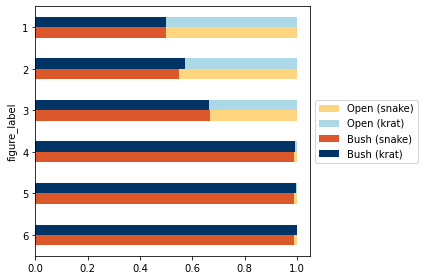

In [3]:
bp_df = result[result['exp_name']=='owl_exp_pure'].groupby(['figure_label','org']).agg(
    # Get max of the duration column for each group
    Bush=pd.NamedAgg(column='mean_bush_pref', aggfunc='mean'),
#     exp_std_bp=pd.NamedAgg(column='mean_bush_pref', aggfunc='std'),
#     exp_se_bp=pd.NamedAgg(column='mean_bush_pref', aggfunc='sem')
    )
#bp_df = bp_df.reset_index()
open_preference = [1-x for x in list(bp_df['Bush'])]
bp_df['Open']= open_preference
bp_df = bp_df.unstack(level=-1)
bp_df=bp_df.iloc[::-1]
bp_df = bp_df[bp_df.columns[::-1]]
#bp_df_owl = bp_df[bp_df['exp_name']=='owl_exp_pure']
#bp_df.head()
# bp_df.head()
colors = [
         '#ADD8E6', #light blue
         '#FFD580', #light Orange
         '#003366', #Dark Blue
         '#DC582A', # Dark Orange
         
         ] 
fig, ax = plt.subplots()

(bp_df['Bush']+bp_df['Open']).plot(kind='barh', color=[colors[1], colors[0]], rot=0, ax=ax)
(bp_df['Bush']).plot(kind='barh', color=[colors[3], colors[2]], rot=0, ax=ax)
#df0['Val3'].plot(kind='bar', color=[colors[5], colors[4]], rot=0, ax=ax)

#legend_labels = ['Open (Krat)','Open (Snake)','Bush (Krat)','Bush (Snake)']
legend_labels = [f'{val} ({context})' for val, context in bp_df.columns]
ax.legend(legend_labels,loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


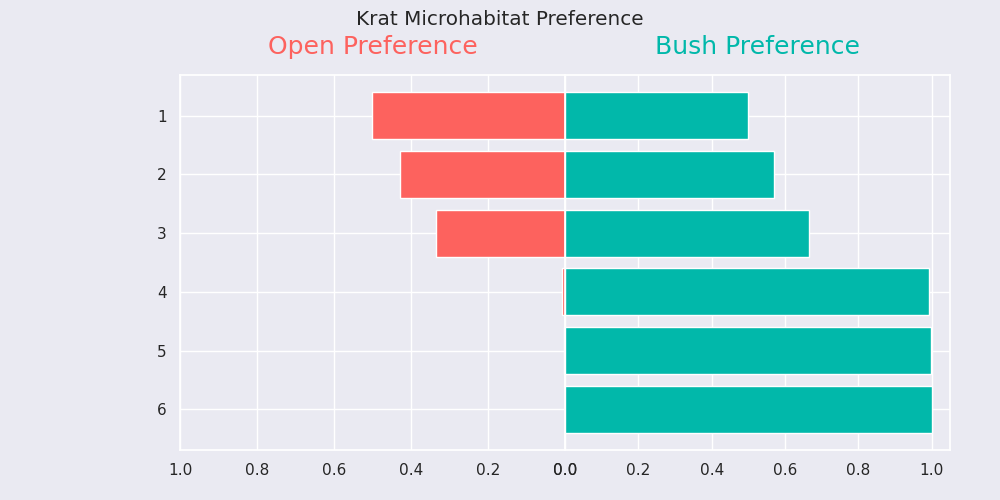

Text(0.5, 0.98, 'Krat Microhabitat Preference')

In [4]:
%matplotlib notebook
sns.set()
bp_df = result[result['exp_name']=='owl_exp_pure'].groupby(['figure_label','org']).agg(
    Bush=pd.NamedAgg(column='mean_bush_pref', aggfunc='mean'),
    )
#bp_df = bp_df.reset_index()
open_preference = [1-x for x in list(bp_df['Bush'])]
bp_df['Open']= open_preference
bp_df = bp_df.unstack(level=-1)
bp_df=bp_df.reset_index()
bp_df.columns=['Experimental_Group','krat_bush','snake_bush','krat_open','snake_open']
bp_df.set_index('Experimental_Group', inplace=True)


font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = bp_df.index
column0 = bp_df['krat_open']
column1 = bp_df['krat_bush']
title0 = 'Open Preference'
title1 = 'Bush Preference'
fig, axes = plt.subplots(figsize=(10,5), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue, **hfont)
axes[0].set(xlim=(0,1))
axes[0].invert_xaxis()
plt.gca().invert_yaxis()
plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)
fig.suptitle("Krat Microhabitat Preference")

# plt.tight_layout()
# plt.show()

In [27]:
help(add_gridspec)

NameError: name 'add_gridspec' is not defined

<IPython.core.display.Javascript object>


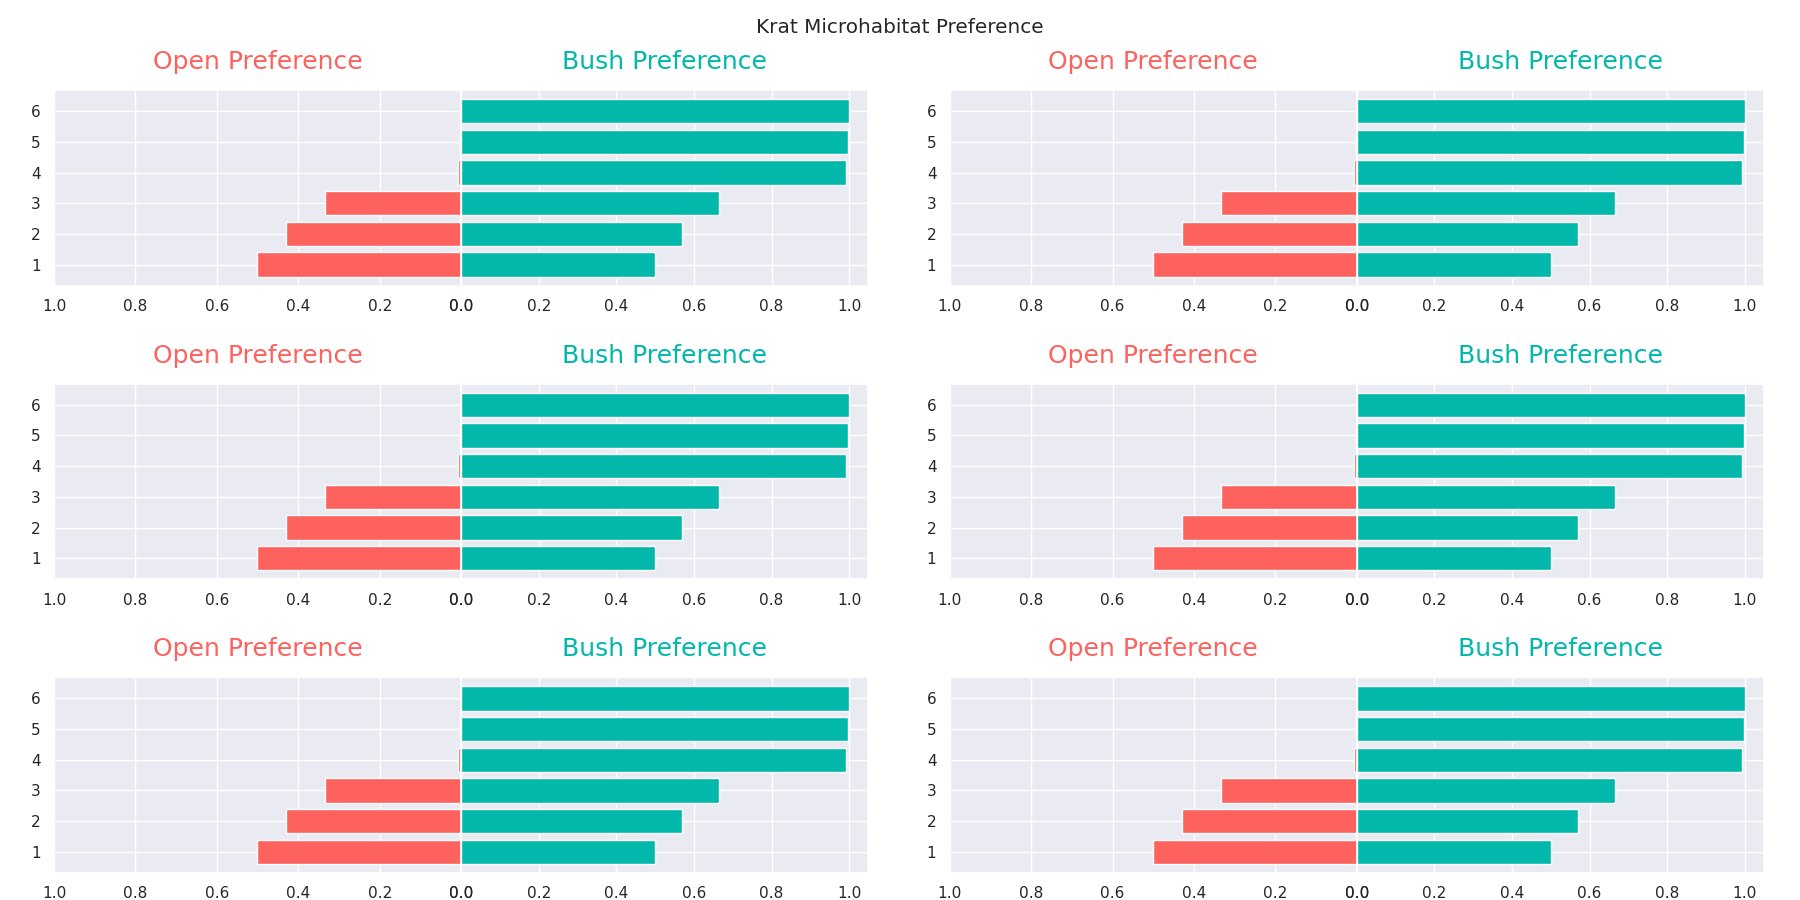

In [58]:
%matplotlib notebook
from matplotlib import gridspec




font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = bp_df.index
column0 = bp_df['krat_open']
column1 = bp_df['krat_bush']
title0 = 'Open Preference'
title1 = 'Bush Preference'

fig = plt.figure(figsize=(18, 9))




left = fig.add_gridspec(3, 2, wspace=0.1, hspace=0.5, left=0.03, right=0.98, bottom=0.03, top=0.9)
grid = plt.GridSpec(3, 1)

for i in range(3):
    for j in range(2):
        right = left[i, j].subgridspec(1, 2, wspace=0, hspace=0.25,width_ratios=[0.5, 0.5]) #height_ratios=[0.15, 0.85]
        axes = right.subplots(sharey=True)
        axes[0].set_title(title0, fontsize=18, pad=15, color=color_red, **hfont)
        axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
        axes[0].invert_yaxis()
        axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
        axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue, **hfont)
        axes[0].set(xlim=(0,1))
        axes[0].invert_xaxis()
        axes[1].invert_yaxis() # if you want the histogram upside down
fig.suptitle("Krat Microhabitat Preference")
plt.show()
    

In [67]:
def get_data(exp_label):
    data = result[result['exp_name']==exp_label].groupby(['figure_label','org']).agg(
        Bush=pd.NamedAgg(column='mean_bush_pref', aggfunc='mean'),
        )
    open_preference = [1-x for x in list(data['Bush'])]
    data['Open']= open_preference
    data = data.unstack(level=-1)
    data=data.reset_index()
    data.columns=['Experimental_Group','krat_bush','snake_bush','krat_open','snake_open']
    data.set_index('Experimental_Group', inplace=True)
    return data

<IPython.core.display.Javascript object>


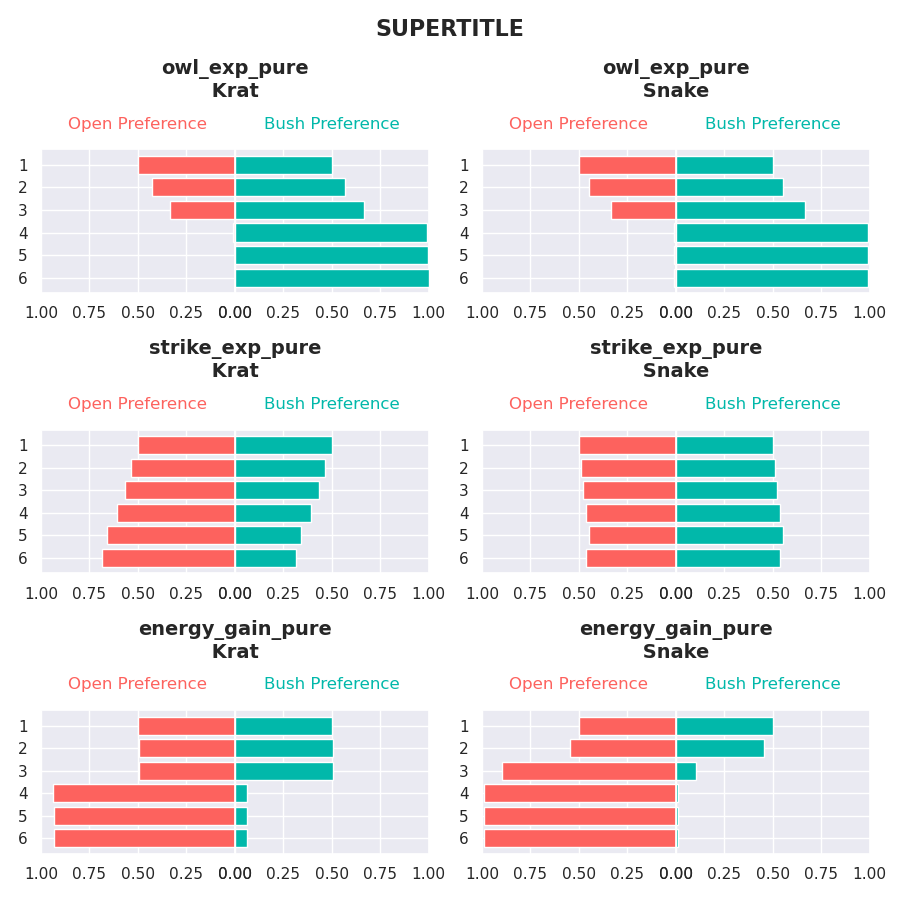

In [77]:
## working fig###

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import SubplotSpec

exps=['owl_exp_pure','owl_exp_pure',
      'strike_exp_pure','strike_exp_pure',
      'energy_gain_pure','energy_gain_pure',]


font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'

title0 = 'Open Preference'
title1 = 'Bush Preference'

rows = 3
cols = 2

fig = plt.figure(figsize=(9, 9))
# grid for pairs of subplots
grid = plt.GridSpec(rows, cols)

for i,exp in enumerate(exps):
    # create fake subplot just to title pair of subplots
    fake = fig.add_subplot(grid[i])
    data=get_data(exp)
    index = data.index
    column0 = data['krat_open']
    column1 = data['krat_bush']
    #  '\n' is important
    if (i % 2)==0:
        fake.set_title(f'{exp}\n Krat \n\n', fontweight='semibold', size=14)
        column0 = data['krat_open']
        column1 = data['krat_bush']
    else:
        fake.set_title(f'{exp}\n Snake \n\n', fontweight='semibold', size=14)
        column0 = data['snake_open']
        column1 = data['snake_bush']
    fake.set_axis_off()

    # create subgrid for two subplots without space between them
    # <https://matplotlib.org/2.0.2/users/gridspec.html>
    gs = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=grid[i], wspace=0)

    # real subplot #1
    ax = fig.add_subplot(gs[0])
    ax.set_title(title0, fontsize=12, pad=15, color=color_red, **hfont)
    ax.barh(index, column0, align='center', color=color_red, zorder=10)
    ax.set(xlim=(0,1))
    ax.invert_xaxis()
    # hide ticks and labels
    #ax.tick_params(left=False, labelleft=False, labelbottom=False, bottom=False)

    # real subplot #2
    ax2 = fig.add_subplot(gs[1], sharey=ax)
    ax2.barh(index, column1, align='center', color=color_blue, zorder=10)
    ax2.set_title(title1, fontsize=12, pad=15, color=color_blue, **hfont)
    ax2.invert_yaxis()
    # hide ticks and labels
    ax2.tick_params(left=False, labelleft=False)
    ax2.set(xlim=(0,1))

fig.patch.set_facecolor('white')
fig.suptitle('SUPERTITLE', fontweight='bold', size=16)
fig.tight_layout()

In [6]:
bp_df.head(10)

,figure_label,krat_bush,snake_bush,krat_open,snake_open
0,1,0.499648,0.499972,-0.500352,-0.500028
1,2,0.570157,0.549847,-0.429843,-0.450153
2,3,0.665595,0.667925,-0.334405,-0.332075
3,4,0.992277,0.989885,-0.007723,-0.010115
4,5,0.998328,0.989892,-0.001672,-0.010108
5,6,0.999448,0.989853,-0.000552,-0.010147


In [3]:
def get_chart(name):
    path = "/home/mremington/Documents/uumarrty_post_sim/uumarrty_post_sim_analysis/images/yaxis_labels/{}.png".format(name)
    im = plt.imread(path)
    return im


def offset_image(coord, name, ax, zoom=0.15):
    img = get_chart(name)
    im = OffsetImage(img, zoom=zoom)
    im.image.axes = ax

    ab = AnnotationBbox(im, (0, coord-1),  xybox=(-30., 0), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)

    ax.add_artist(ab)
    
def get_legend(abrev_name,coord,ax,zoom=1):
    path = "/home/mremington/Documents/uumarrty_post_sim/uumarrty_post_sim_analysis/images/Legends/{}_legend.png".format(abrev_name)
    im = plt.imread(path)
    im = OffsetImage(im, zoom=zoom)
    ab = AnnotationBbox(im, (0, 0),  xybox=(0, 100), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)

    ax.add_artist(ab)

In [49]:
temp = temp_data(df=result,filter_val='owl_exp_pure')
temp.head()

,exp_name,sim_id,exp,org,count_str_flip,mean_strategy_flip_time,std_strategy_flip_time,var_strategy_flip_time,mean_magnitude_of_strategy_flip,std_magnitude_of_strategy_flip,var_magnitude_of_strategy_flip,data_type,mean_bush_pref,figure_label
0,owl_exp_pure,06028c5bc0bb4674a7d322d9ac32ed5e,experiment1,krat,356,16.833803,12.288573,151.009024,0.843390,0.360106,0.129677,krat,0.514374,1
1,owl_exp_pure,06028c5bc0bb4674a7d322d9ac32ed5e,experiment1,snake,373,2.663978,1.234060,1.522904,0.887674,0.263518,0.069442,snake,0.494487,1
2,owl_exp_pure,078a550708c94ad589f54acb02b8b55a,experiment1,krat,385,15.484375,10.767651,115.942314,0.805410,0.393076,0.154509,krat,0.547678,1
3,owl_exp_pure,078a550708c94ad589f54acb02b8b55a,experiment1,snake,383,2.591623,1.096754,1.202869,0.909786,0.211419,0.044698,snake,0.463121,1
4,owl_exp_pure,0ebf538877ac46fda69541db6a494fa0,experiment1,krat,372,16.123989,10.884938,118.481882,0.852848,0.351398,0.123480,krat,0.504739,1


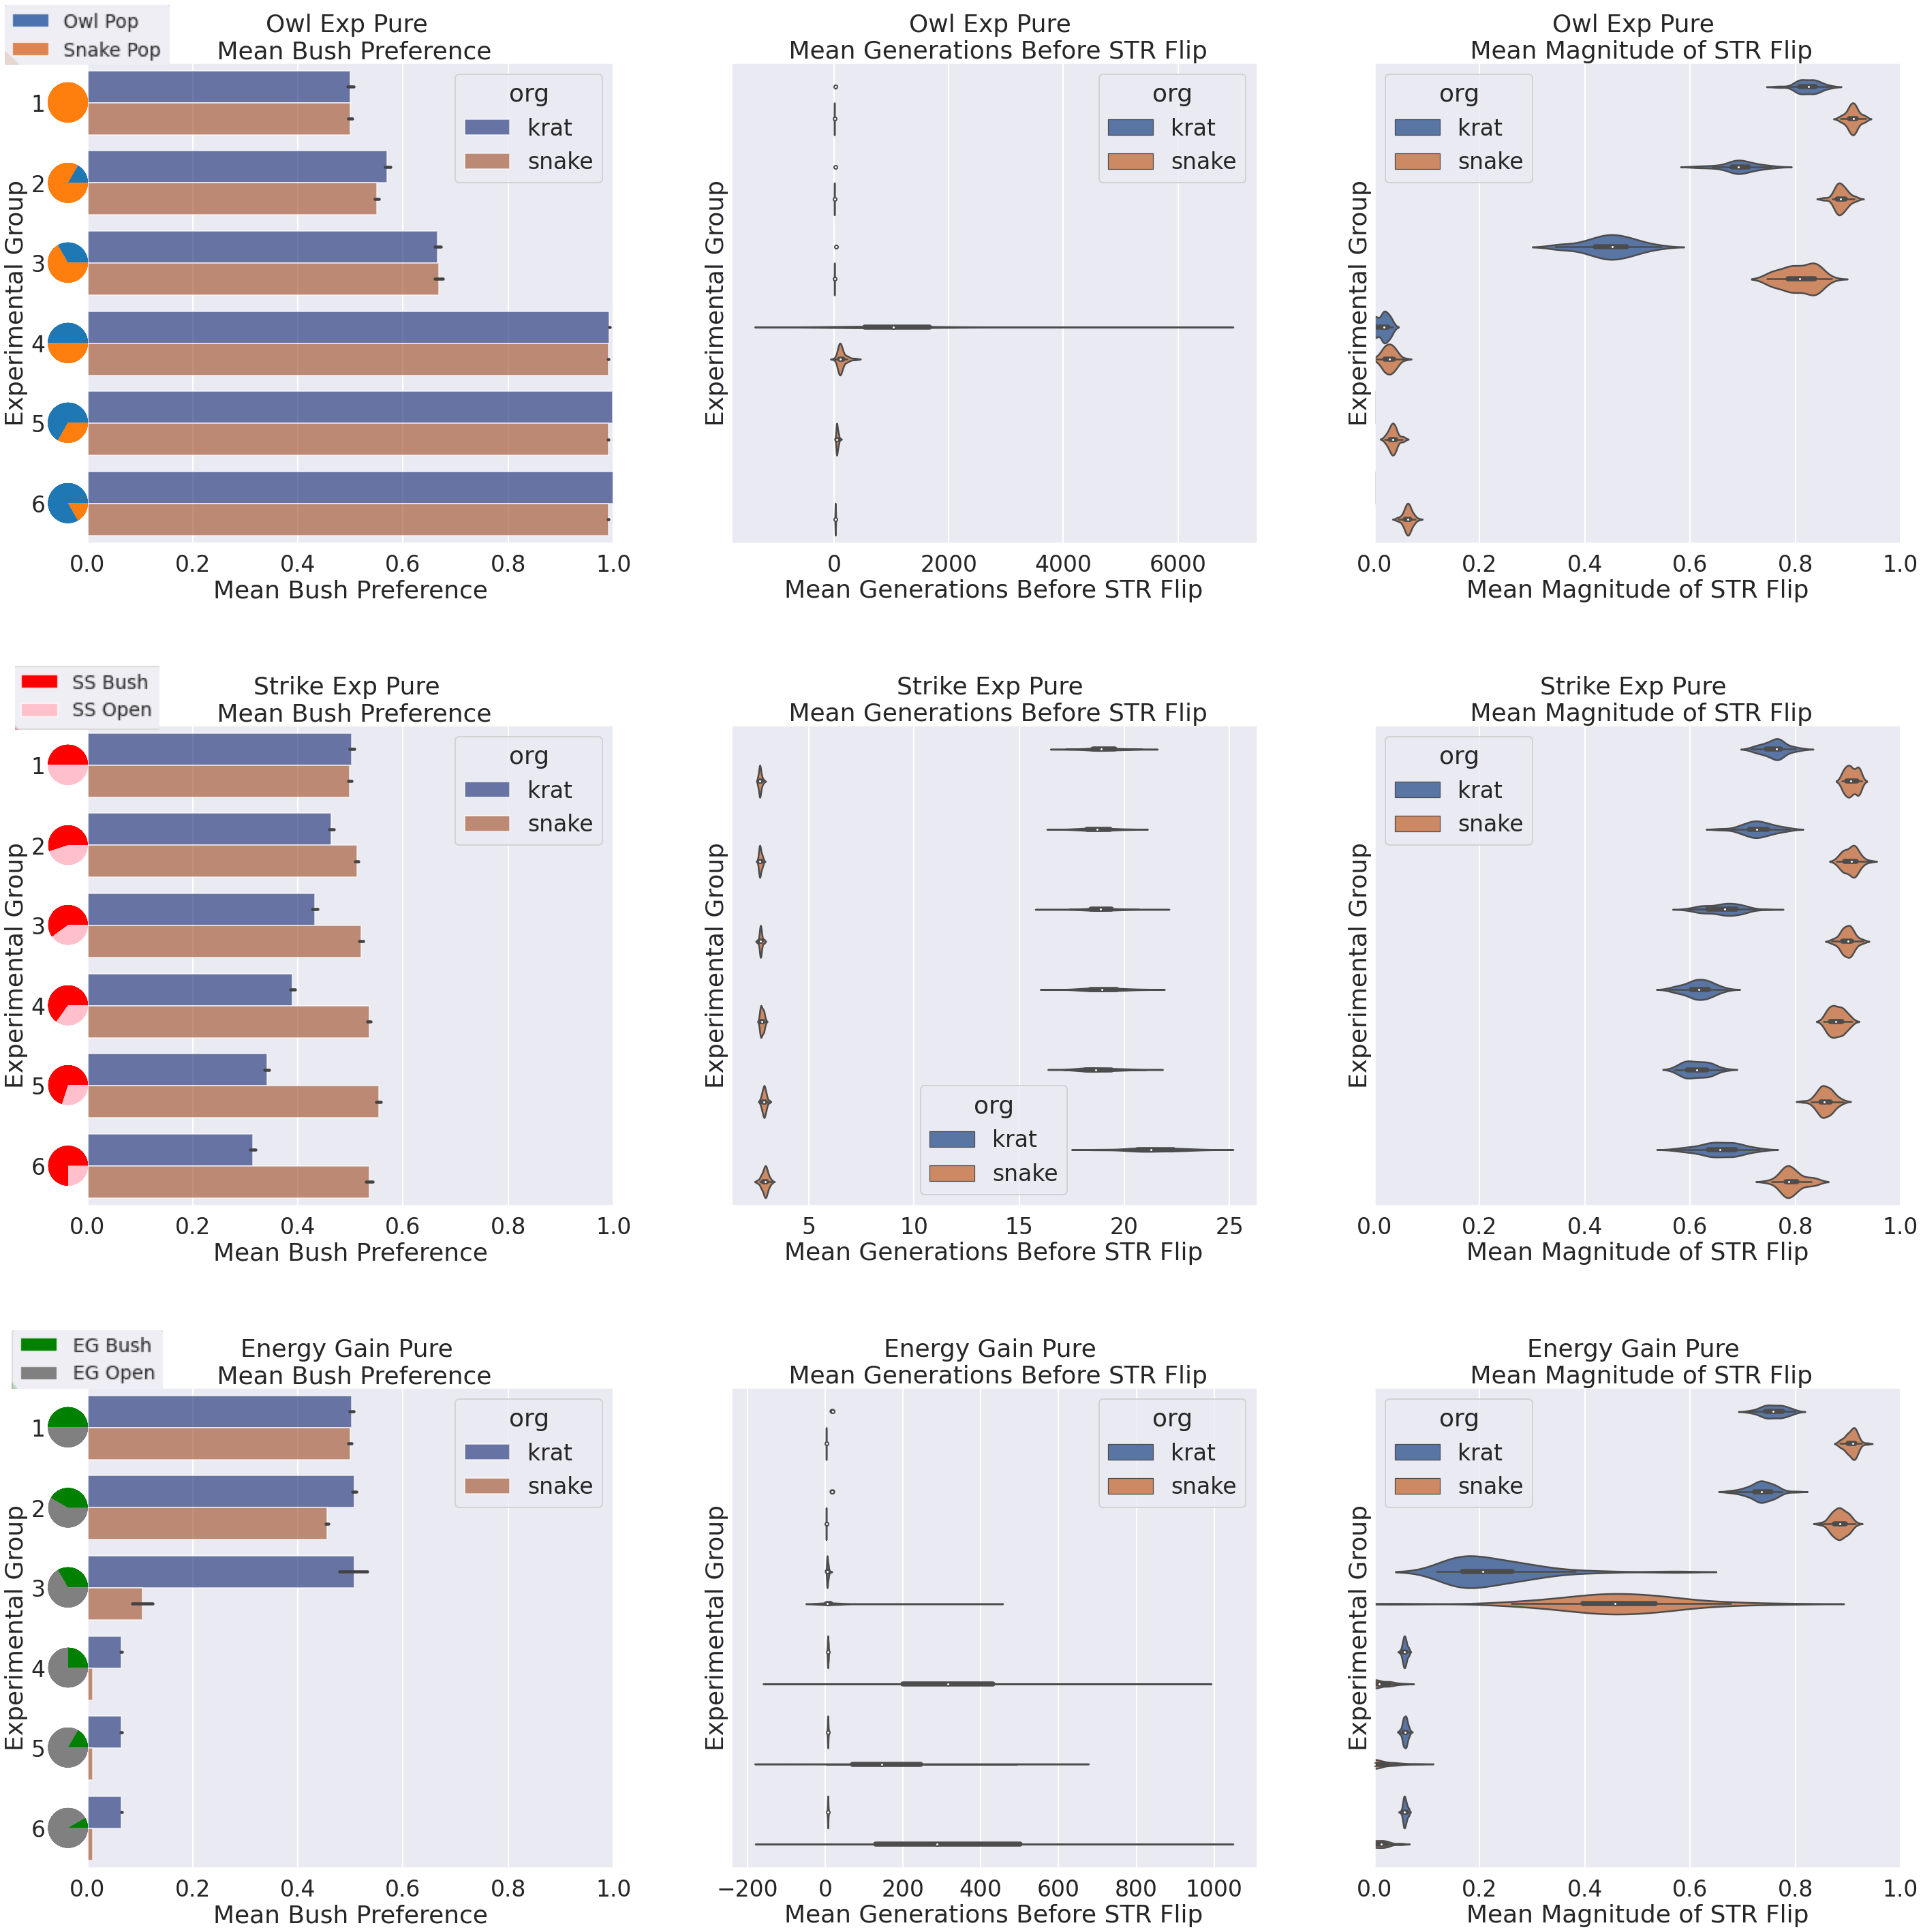

In [96]:
#######################
##### Official Chart ##
#######################
pure_exps = ['owl_exp_pure','strike_exp_pure','energy_gain_pure']

fig, axes = plt.subplots(len(pure_exps), 3, sharex=False,sharey=True, figsize=(42,42))



for i, title in enumerate(pure_exps):
    temp = temp_data(df=result,filter_val=title)
    sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 2.5})
    g0 = sns.barplot(
            ax=axes[i,0], data=temp, 
            x="mean_bush_pref", y="figure_label", hue="org",
            ci=95, palette="dark", alpha=.6
        ).set(title='{} \n Mean Bush Preference'.format(format_title(title)),
              ylabel = "Experimental Group",
              xlabel = "Mean Bush Preference",
              xlim=(0, 1))
    axes[i,0].tick_params(axis='y', which='major', pad=50)
    if title in ['owl_exp_pure','owl_exp_mixed']:
        for j in range(1,7):
            name = 'owl_figure_label_{}'.format(j)
            offset_image(j, name, axes[i,0],zoom=0.3)
    elif title in ['strike_exp_pure','strike_exp_mixed']:
        for j in range(1,7):
            name = 'strike_success_figure_label_{}'.format(j)
            offset_image(j, name, axes[i,0],zoom=0.3)
    elif title in ['energy_gain_pure','energy_gain_mixed']:
        for j in range(1,7):
            name = 'energy_gain_figure_label_{}'.format(j)
            offset_image(j, name, axes[i,0],zoom=0.3)
    get_legend(abrev_name='owl',coord=0,ax=axes[0,0],zoom=2)
    get_legend(abrev_name='ss',coord=0,ax=axes[1,0],zoom=2)
    get_legend(abrev_name='energy_gain',coord=0,ax=axes[2,0],zoom=2)
    g1 = sns.violinplot(ax=axes[i,1],
                        x="mean_strategy_flip_time", y="figure_label",
                        hue="org", data=temp).set(title='{} \n Mean Generations Before STR Flip'.format(format_title(title)),
                                                  ylabel = "Experimental Group",
                                                  xlabel = "Mean Generations Before STR Flip")
    g2 = sns.violinplot(ax=axes[i,2],
                        x="mean_magnitude_of_strategy_flip", y="figure_label",
                        hue="org", data=temp).set(title='{} \n Mean Magnitude of STR Flip'.format(format_title(title)),
                                                  ylabel = "Experimental Group",
                                                  xlabel = "Mean Magnitude of STR Flip",
                                                  xlim=(0, 1))
    
    #height = .01
    #fig.figimage(eg_legend, 0, fig.bbox.ymax - height)


  

# A JointGrid


#gs.update(top=0.7)
fig.tight_layout(pad=3.0)
plt.savefig('/home/mremington/Documents/uumarrty_post_sim/uumarrty_post_sim_analysis/images/figs/mh_pref_grid.png')
plt.show()
# https://stackoverflow.com/questions/69800347/bidirectional-bar-plot-in-python-how-to-remove-all-background-colours

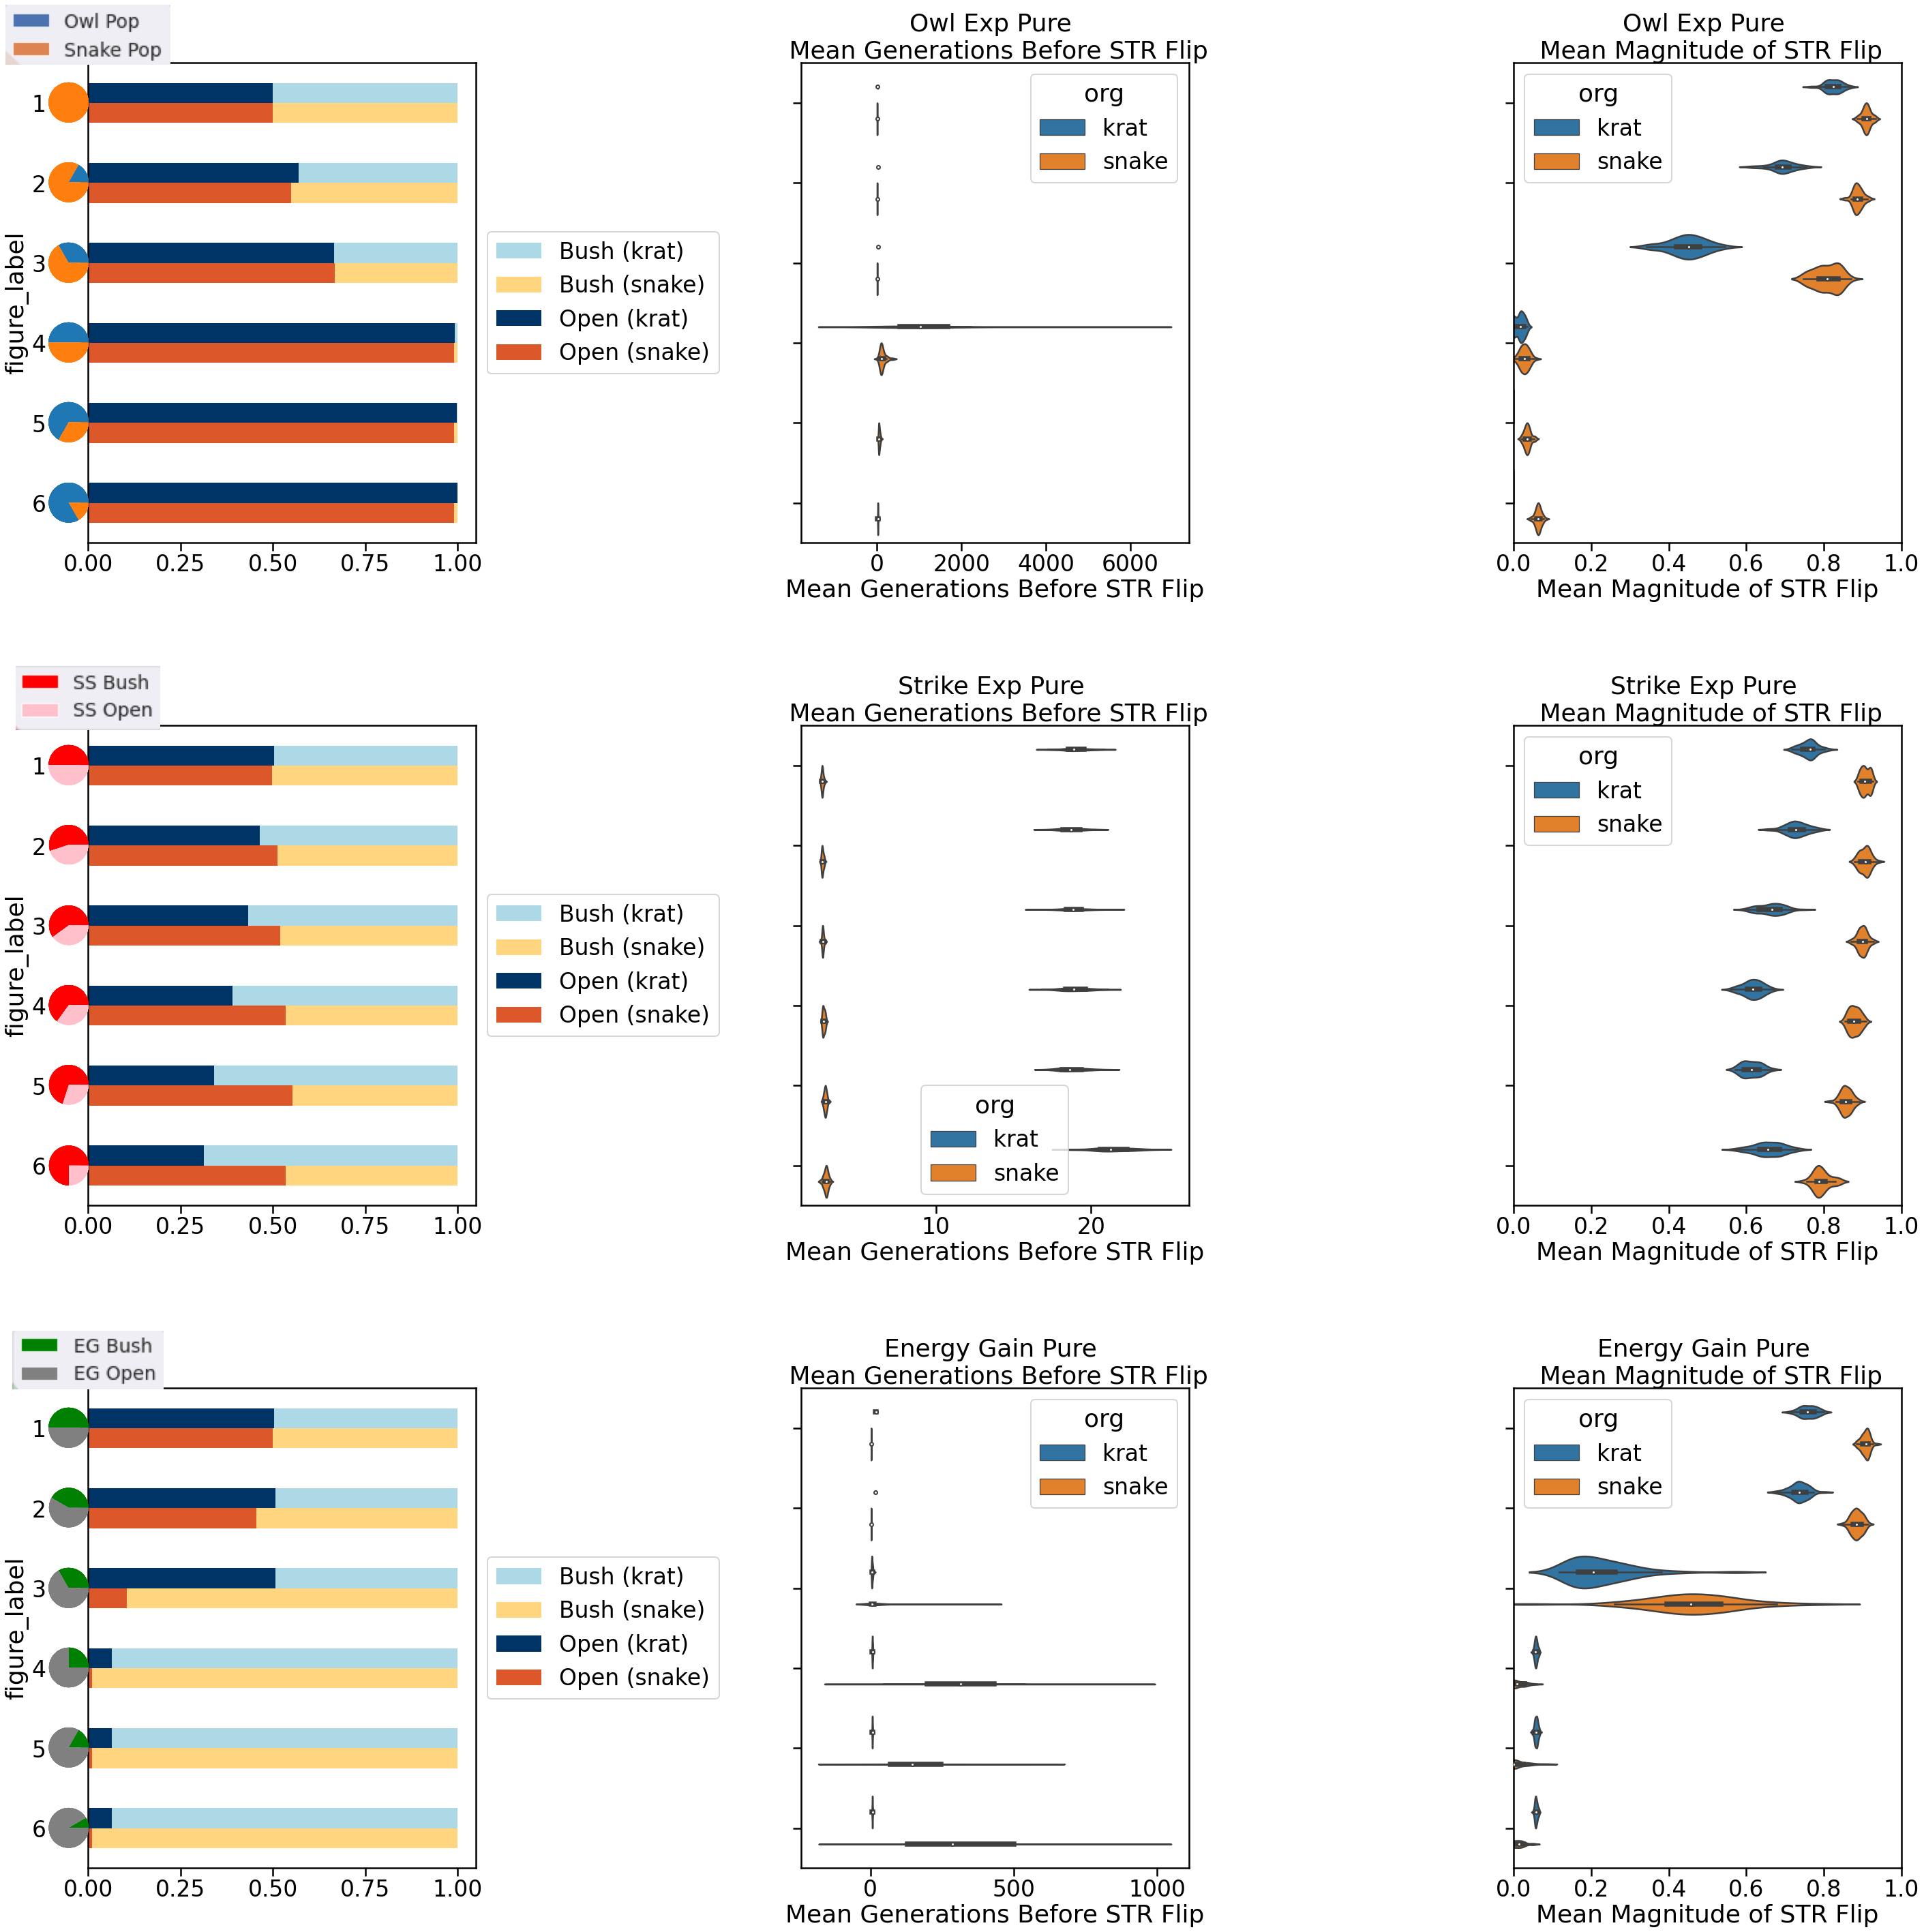

In [61]:
#######################
##### UnOfficial Chart 2 ##
#######################
pure_exps = ['owl_exp_pure','strike_exp_pure','energy_gain_pure']

fig, axes = plt.subplots(len(pure_exps), 3, sharex=False,sharey=True, figsize=(42,42))

colors = [
         '#FFD580', #light Orange
         '#ADD8E6', #light blue
         '#DC582A', # Dark Orange
         '#003366', #Dark Blue
         ] 

for i, title in enumerate(pure_exps):
    temp = temp_data(df=result,filter_val=title)
    bar_data=format_bar_chart_data(temp=temp)
    sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 2.5})
    # Bar Chart
    (bar_data['Bush']+bar_data['Open']).plot(kind='barh', color=[colors[1], colors[0]], rot=0, ax=axes[i,0])
    (bar_data['Bush']).plot(kind='barh', color=[colors[3], colors[2]], rot=0, ax=axes[i,0])
    legend_labels = ['Bush (krat)','Open (krat)','Bush (snake)','ope']
    axes[i,0].legend(legend_labels,loc='center left', bbox_to_anchor=(1, 0.5))
    axes[i,0].tick_params(axis='y', which='major', pad=50)
    if title in ['owl_exp_pure','owl_exp_mixed']:
        for j in range(1,7):
            name = 'owl_figure_label_{}'.format(j)
            offset_image(j, name, axes[i,0],zoom=0.3)
    elif title in ['strike_exp_pure','strike_exp_mixed']:
        for j in range(1,7):
            name = 'strike_success_figure_label_{}'.format(j)
            offset_image(j, name, axes[i,0],zoom=0.3)
    elif title in ['energy_gain_pure','energy_gain_mixed']:
        for j in range(1,7):
            name = 'energy_gain_figure_label_{}'.format(j)
            offset_image(j, name, axes[i,0],zoom=0.3)
    get_legend(abrev_name='owl',coord=0,ax=axes[0,0],zoom=2)
    get_legend(abrev_name='ss',coord=0,ax=axes[1,0],zoom=2)
    get_legend(abrev_name='energy_gain',coord=0,ax=axes[2,0],zoom=2)
    # Violin Plot 1
    g1 = sns.violinplot(ax=axes[i,1],
                        x="mean_strategy_flip_time", y="figure_label",
                        hue="org", data=temp).set(title='{} \n Mean Generations Before STR Flip'.format(format_title(title)),
                                                  ylabel = "Experimental Group",
                                                  xlabel = "Mean Generations Before STR Flip")
    g2 = sns.violinplot(ax=axes[i,2],
                        x="mean_magnitude_of_strategy_flip", y="figure_label",
                        hue="org", data=temp).set(title='{} \n Mean Magnitude of STR Flip'.format(format_title(title)),
                                                  ylabel = "Experimental Group",
                                                  xlabel = "Mean Magnitude of STR Flip",
                                                  xlim=(0, 1))
    
    #height = .01
    #fig.figimage(eg_legend, 0, fig.bbox.ymax - height)


  

# A JointGrid


#gs.update(top=0.7)
fig.tight_layout(pad=3.0)
plt.savefig('/home/mremington/Documents/uumarrty_post_sim/uumarrty_post_sim_analysis/images/figs/mh_pref_grid.png')
plt.show()


In [4]:
exps = result['exp_name'].unique()
# An lmplot


# fig, axes = plt.subplots(len(exps), 3, sharex=True,sharey=False, figsize=(18,36))

# for i, title in enumerate(exps):
#     temp = temp_data(df=result,filter_val=title)
#     g0 = sns.barplot(
#             ax=axes[i,0], data=temp, 
#             x='figure_label', y="mean_bush_pref", hue="org",
#             ci=95, palette="dark", alpha=.6
#         ).set(title='{} \n Mean Bush Preference'.format(format_title(title)),
#               xlabel = "Experimental Group",
#               ylabel = "Mean Bush Preference",
#               ylim=(0, 1))
#     g1 = sns.violinplot(ax=axes[i,1],x='figure_label', y="mean_strategy_flip_time",hue="org", palette="dark", data=temp).set(title='{} \n Mean Generations Before STR Flip'.format(format_title(title)),
#               xlabel = "Experimental Group",
#               ylabel = "Mean Generations Before STR Flip")
#     g2 = sns.violinplot(ax=axes[i,2],x='figure_label', y="mean_magnitude_of_strategy_flip", palette="dark", hue="org", data=temp).set(title='{} \n Mean Magnitude of STR Flip'.format(format_title(title)),
#               xlabel = "Experimental Group",
#               ylabel = "Mean Magnitude of STR Flip",
#               ylim=(0, 1))

    

# # A JointGrid


# #gs.update(top=0.7)
# plt.savefig('results.png')
# plt.show()


In [5]:
exps = result['exp_name'].unique()
# An lmplot


# fig, axes = plt.subplots(len(exps), 4, sharex=True,sharey=False, figsize=(24,36))

# for i, title in enumerate(exps):
#     temp = temp_data(df=result,filter_val=title)
#     ##Initial condition figs
#     if title in ['owl_exp_pure','owl_exp_mixed']:
#         df_owl.set_index('figure_label').plot(ax=axes[i,0],kind='bar', stacked=True).set(
#             title='{} \n Initial Conditions'.format(format_title(title)),
#               xlabel = "Experimental Group",
#               ylabel = "Predators")
#     elif title in ['strike_exp_pure','strike_exp_mixed']:
#         df_ss.set_index('figure_label').plot(ax=axes[i,0],kind='bar', stacked=True).set(
#             title='{} \n Initial Conditions'.format(format_title(title)),
#               xlabel = "Experimental Group",
#               ylabel = "Strike Success Probability")
#     elif title in ['energy_gain_pure','energy_gain_mixed']:
#         df_eg.set_index('figure_label').plot(ax=axes[i,0],kind='bar', stacked=True).set(
#             title='{} \n Initial Conditions'.format(format_title(title)),
#               xlabel = "Experimental Group",
#               ylabel = "Energy Gain")
#     ## MHPREF
#     g1 = sns.barplot(
#             ax=axes[i,1], data=temp, 
#             x='figure_label', y="mean_bush_pref", hue="org",
#             ci=95, palette="dark", alpha=.6
#         ).set(title='{} \n Mean Bush Preference'.format(format_title(title)),
#               xlabel = "Experimental Group",
#               ylabel = "Mean Bush Preference",
#               ylim=(0, 1))
#     ## Generations
#     g2 = sns.violinplot(ax=axes[i,2],x='figure_label', y="mean_strategy_flip_time",hue="org", palette="dark", data=temp).set(title='{} \n Mean Generations Before STR Flip'.format(format_title(title)),
#               xlabel = "Experimental Group",
#               ylabel = "Mean Generations Before STR Flip")
#     #Magnitude
#     g3 = sns.violinplot(ax=axes[i,3],x='figure_label', y="mean_magnitude_of_strategy_flip", palette="dark", hue="org", data=temp).set(title='{} \n Mean Magnitude of STR Flip'.format(format_title(title)),
#               xlabel = "Experimental Group",
#               ylabel = "Mean Magnitude of STR Flip",
#               ylim=(0, 1))

    

# # A JointGrid


# #gs.update(top=0.7)
# #plt.savefig('results_with_ic.png')
# plt.show()


In [6]:
#df_eg.head()

In [1]:
help(sns.plot)

NameError: name 'sns' is not defined